In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

df = pd.read_csv('../base_dados/beber_amostra.csv', low_memory=False)


In [2]:
# Separar features e target
X = df.drop('drk_yn', axis=1)
y = df['drk_yn']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo intervalos de k e distâncias
k_values = np.arange(1, 31, 3)
distances = ['euclidean', 'manhattan', 'minkowski']

# Armazenar resultados
results = []

for k in k_values:
    for dist in distances:
        knn = KNeighborsClassifier(n_neighbors=k, metric=dist)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({'k': k, 'distance': dist, 'accuracy': acc})

        # Calcular matriz de confusão
        cm = confusion_matrix(y_test, y_pred)

        # Salvar a matriz de confusão
        # cm_df = pd.DataFrame(cm, index=[f'Classe {i}' for i in range(len(cm))], 
        #                      columns=[f'Classe {i}' for i in range(len(cm))])
        # cm_df.to_csv(f'../base_dados/resultados_mineracao_dados/matriz_confusao_knn_k{k}_{dist}.csv', index=True)

# Salvar resultados
results_df = pd.DataFrame(results)
results_df.to_csv('../base_dados/resultados_mineracao_dados/knn_results_comum.csv', index=False)

print("Resultados salvos em knn_results_comum.csv")

Resultados salvos em knn_results_comum.csv


AttributeError: 'numpy.ndarray' object has no attribute 'set_text'

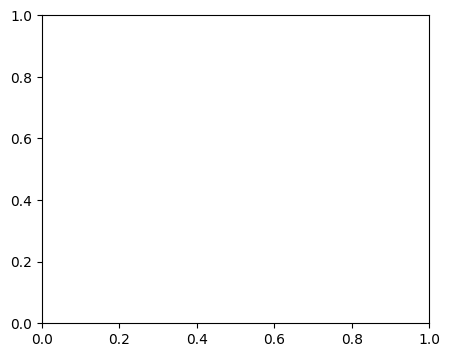

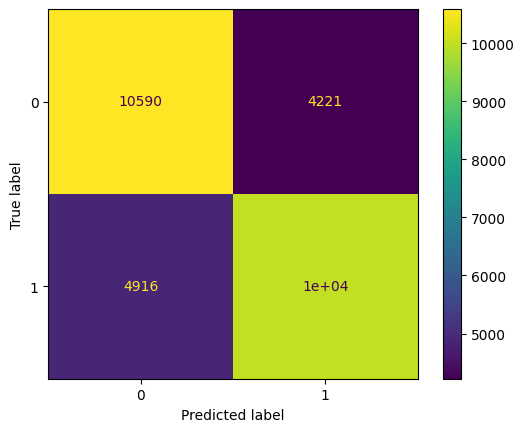

In [ ]:
# Separar features e target
X = df.drop('drk_yn', axis=1)
y = df['drk_yn']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir melhor K e distância
best_k = 28
best_distance = "manhattan"

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_distance)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão com tons de amarelo/roxo
fig, ax = plt.subplots(figsize=(5, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()  

# Forçar exibição de números inteiros sem notação científica
# for text in disp.text_:
#     text.set_text(f"{int(float(text.get_text()))}")

# Remover rótulos dos eixos
# ax.set_title("")
# ax.set_xlabel("")
# ax.set_ylabel("")

# Mostrar a matriz de confusão
plt.show()